In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings(action='ignore', category=SettingWithCopyWarning)
weeks = mdates.DayLocator(interval=7)
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

In [2]:
states_data = pd.read_csv(r'K:\covid-19-data\us-states.csv', parse_dates=['date'])
counties_data = pd.read_csv(r'K:\covid-19-data\us-counties.csv', parse_dates=['date'])

In [3]:
states_data.tail()

,date,state,fips,cases,deaths
7324,2020-07-13,Virginia,51,71642,1968
7325,2020-07-13,Washington,53,43538,1439
7326,2020-07-13,West Virginia,54,4313,97
7327,2020-07-13,Wisconsin,55,40603,828
7328,2020-07-13,Wyoming,56,1903,21


In [4]:
pop_data = pd.read_csv(r'K:\ACSDT5Y2018.B01003_data_with_overlays_2020-07-10T111915.csv')

In [5]:
pop_data.head()

,GEO_ID,NAME,B01003_001E,B01003_001M
0,id,Geographic Area Name,Estimate!!Total,Margin of Error!!Total
1,0400000US27,Minnesota,5527358,*****
2,0400000US28,Mississippi,2988762,*****
3,0400000US29,Missouri,6090062,*****
4,0400000US30,Montana,1041732,*****


In [6]:
def state_data(name):
    pop_entry = pop_data[pop_data['NAME'] == name]
    if pop_entry['GEO_ID'].values[0].startswith('04'):
        data = states_data[states_data['state'] == name]
    elif pop_entry['GEO_ID'].values[0].startswith('05'):
        county, state = name.split(', ')
        if county == 'New York County' and state == 'New York':
            county = 'New York City'
        elif county.endswith(' County'):
            county = county[:-7]
        data = counties_data[(counties_data['state'] == state).values & (counties_data['county'] == county).values]
    pop = int(pop_entry.values[0][2])
    data['cases'] = data['cases'] / pop * 100000
    return data

In [7]:
def plot(data, colors=None):
    fig, ax = plt.subplots(figsize=(16, 9))
    if isinstance(data, dict):
        for label, dat in data.items():
            ax.plot(dat['date'], dat['cases'].diff().rolling(7).mean(), label=label)
    elif isinstance(data, list):
        for i, region in enumerate(data):
            dat = state_data(region)
            if colors is not None:
                if isinstance(colors[i], tuple):
                    ax.plot(dat['date'], dat['cases'].diff().rolling(7).mean(), label=region, color=colors[i][0], linestyle=(0,(5,5)), linewidth=2)
                    ax.plot(dat['date'], dat['cases'].diff().rolling(7).mean(), label=region, color=colors[i][1], linestyle=(5,(5,5)), linewidth=2)
                else:
                    ax.plot(dat['date'], dat['cases'].diff().rolling(7).mean(), label=region, color=colors[i], linewidth=2)
            else:
                ax.plot(dat['date'], dat['cases'].diff().rolling(7).mean(), label=region)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    ax.xaxis.set_minor_locator(weeks)
    ax.set_xlabel('Date')
    ax.set_ylabel('Cases per 100,000')
    ax.legend()
    plt.show()

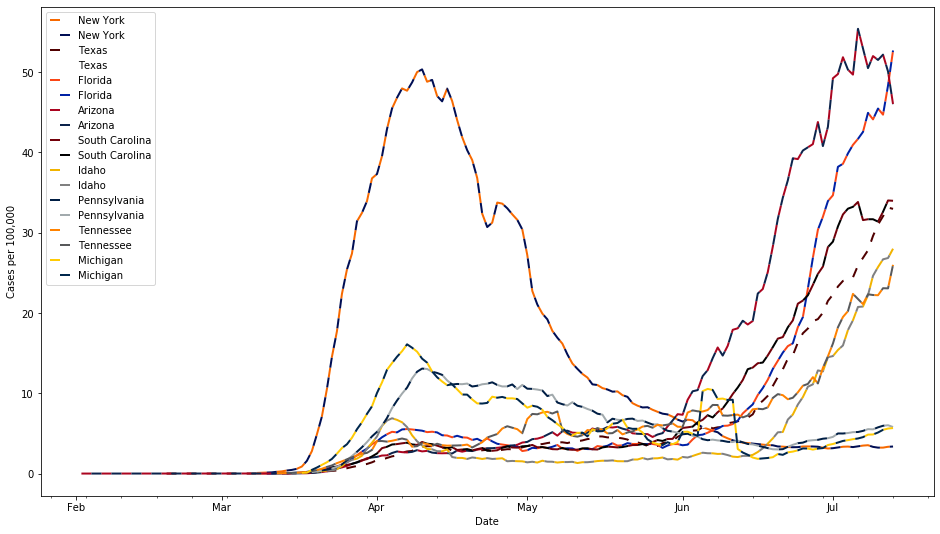

In [8]:
plot(['New York', 'Texas', 'Florida', 'Arizona', 'South Carolina', 'Idaho', 'Pennsylvania', 'Tennessee', 'Michigan'],
    colors=[('#F76900', '#000E54'), ('#500000', '#FFFFFF'), ('#FA4616', '#0021A5'),
            ('#AB0520', '#0C234B'), ('#73000a', '#000000'), ('#F1B300', '#808080'),
            ('#001E44', '#A2AAAD'), ('#FF8200', '#58595B'), ('#FFCB05', '#00274C')])

In [9]:
counties_data.tail()

,date,county,state,fips,cases,deaths
331174,2020-07-13,Sweetwater,Wyoming,56037.0,150,0
331175,2020-07-13,Teton,Wyoming,56039.0,162,1
331176,2020-07-13,Uinta,Wyoming,56041.0,205,0
331177,2020-07-13,Washakie,Wyoming,56043.0,42,5
331178,2020-07-13,Weston,Wyoming,56045.0,3,0


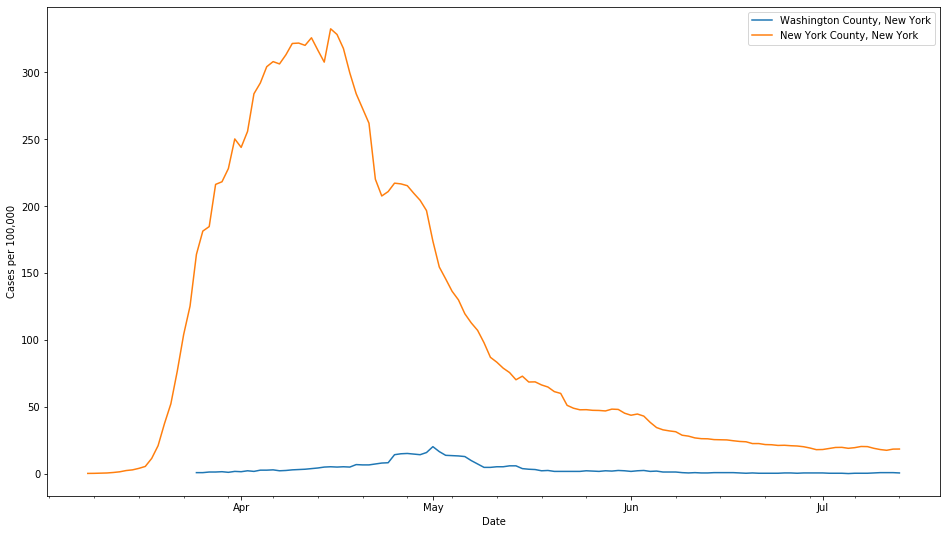

In [10]:
plot(['Washington County, New York', 'New York County, New York'])

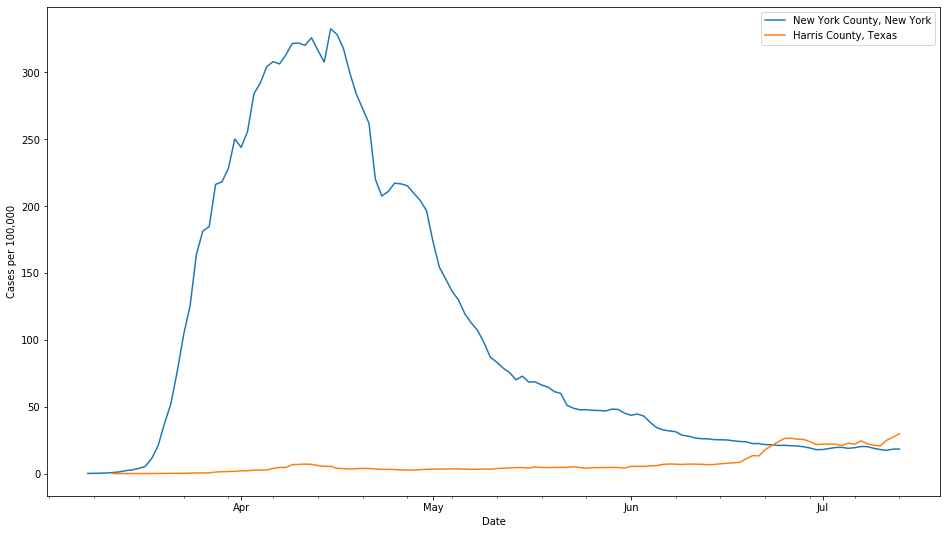

In [11]:
plot(['New York County, New York', 'Harris County, Texas'])

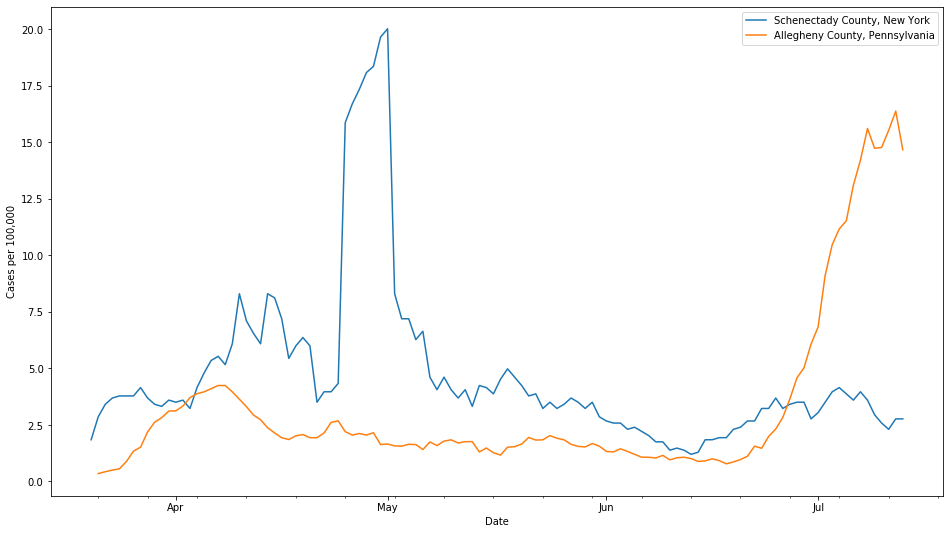

In [12]:
plot(['Schenectady County, New York', 'Allegheny County, Pennsylvania'])